<a href="https://colab.research.google.com/github/EdwardCaleb/Reinforcement-Learning-CSE437/blob/main/Lab1_bandit_EdwardLopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [3]:
%pylab inline
from scipy.stats import norm
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [5]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

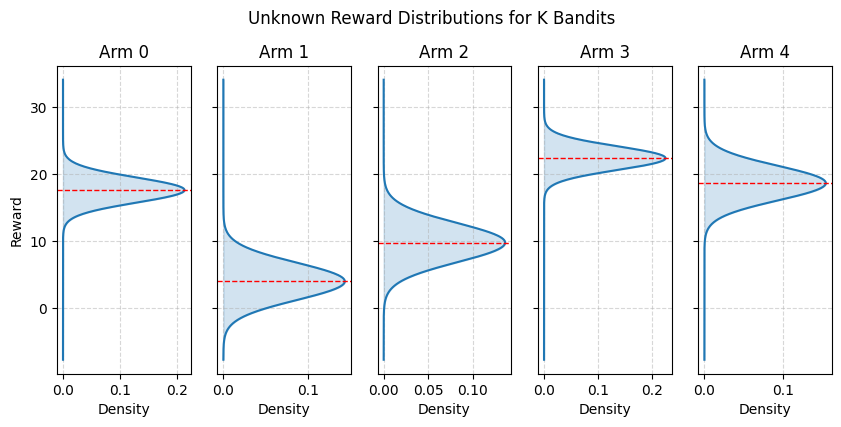

In [6]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

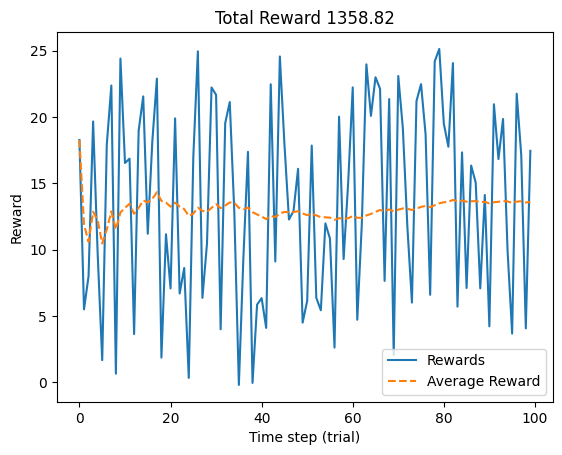

In [46]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

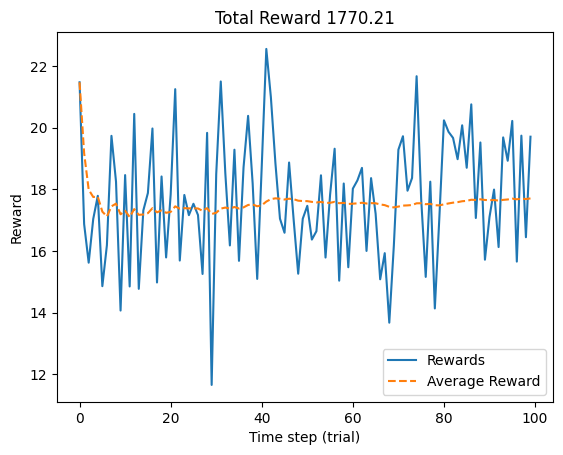

In [48]:
# Estimations
Q = np.zeros(K)   # mean estimation per arm
N = np.zeros(K)   # number of times the arm was choosen

# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # epsilon decay: 1/(t+1)
  epsilon = 0.1 / (t + 1)

  # --- action selection ---
  if np.random.rand() < epsilon:
      # exploración
      a = np.random.randint(0, K)
  else:
      # explotación (elige el mejor estimado hasta ahora)
      a = np.argmax(Q)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Text(0, 0.5, 'Reward')

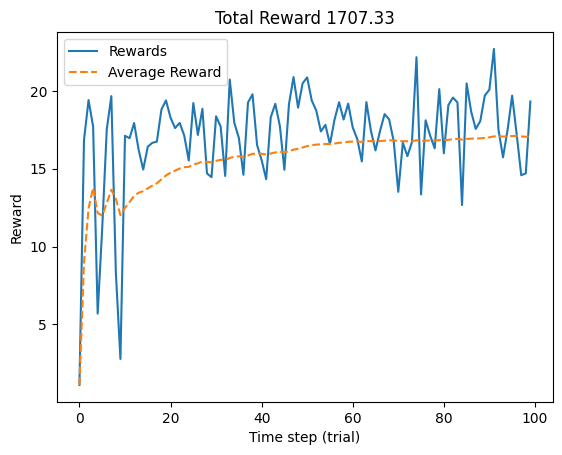

In [9]:
####### 1: GREEDY STRATEGY
# Estimations
Q = np.zeros(K)   # mean estimation per arm
N = np.zeros(K)   # number of times the arm was choosen

# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # high starting epsilon
  if t < T/10:
    epsilon = 1
  else:
    epsilon = 0

  # --- action selection ---
  if np.random.rand() < epsilon:
      # exploración
      a = np.random.randint(0, K)
  else:
      # explotación (elige el mejor estimado hasta ahora)
      a = np.argmax(Q)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

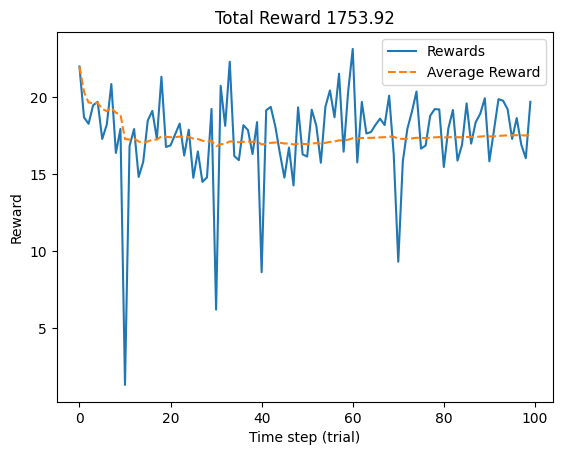

In [77]:
####### 2: EPSILON GREEDY:
# Estimations
Q = np.zeros(K)   # mean estimation per arm
N = np.zeros(K)   # number of times the arm was choosen

# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # greedy epsilon
  if t%10 < 1:
    epsilon = 1
  else:
    epsilon = 0

  # --- action selection ---
  if np.random.rand() < epsilon:
      # exploración
      a = np.random.randint(0, K)
  else:
      # explotación (elige el mejor estimado hasta ahora)
      a = np.argmax(Q)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

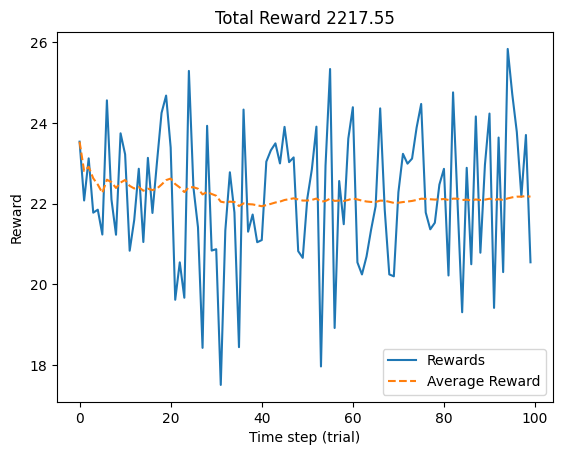

In [31]:
####### 3: Thompson Sampling (#######################ToDo##################)
# --- Bayesian hyperparameters ---
# Prior: mu ~ Normal(mu0, tau2)
mu0 = 0.0
tau2 = 10.0   # large prior variance = weakly informative prior

# Variance (noise) of the rewards (assumed known)
sigma2 = 1.0  # if your rewards are very noisy, try 2.0 or 4.0

# Estimations
Q = np.full(K, mu0)      # posterior mean per arm (using Q to keep the same variable name)
N = np.zeros(K)          # number of times each arm was chosen
V = np.full(K, tau2)     # posterior variance per arm

# Rewards
rewards = []

# For T trials
for t in range(T):
  # --- Action selection (Thompson Sampling) ---
  # sample a "plausible mean" for each arm from its posterior
  theta = np.random.normal(loc=Q, scale=np.sqrt(V))
  a = int(np.argmax(theta))  # chosen arm

  # --- Real reward from the environment (same as in your lab) ---
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)

  # --- Bayesian update for the chosen arm ---
  # Normal-Normal posterior with known variance:
  # V_post = 1 / (1/V_prior + 1/sigma2)
  # Q_post = V_post * (Q_prior/V_prior + r/sigma2)
  prec_prior = 1.0 / V[a]
  prec_like  = 1.0 / sigma2
  V_post = 1.0 / (prec_prior + prec_like)
  Q_post = V_post * (Q[a] * prec_prior + r * prec_like)

  V[a] = V_post
  Q[a] = Q_post
  N[a] += 1

# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

# Answers
1. The advantage is that with larger ϵ it is possible to explore more before so we dont get stuck in an suboptimal reward. Smaller ϵ favors explotation, which can be used to get short-term rewards.
2. Probably it would be time to implement other robust algorithm, because the greedy strategy never explores once it commits to an arm, it still can get rewards, but not in an optimal way regarding time efficiency. It will fail to adapt to new conditions.
3. Larger ϵ can still be exploring over time, so it is possible to find the optimal strategy faster, in the long run it could accumulate a bigger reward. It directly controls the balance, small ε emphasizes exploitation, large ε ensures ongoing exploration.
4. If the number of arms increases, it will take more samples to get an accurate mean and std value, and due to the way the epsilon-greedy works, it won't perform well. ε-greedy would be less efficient because random exploration will tend to waste pulls on poor arms. A small ε may never discover the best arm, and a large ε leads to excessive exploration.
